In [1]:
import sys
sys.path.append("/home/ajag/tcdona3")
import math
from tcdona2.polatis import Polatis
from monitor import RoadmMonitor
from ila import ILA
from bbsource import BBS
import time     
import json
from utils import *
from teraflex import tflex


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-zknr_h4p because the default path (/home/ajag/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
pol = Polatis()
pol.login()

'\r\n\n   PolatisOXC 24-08-27 00:27:04\r\nM  123 COMPLD\r\n;'

In [3]:
pol = Polatis()
pol.login()

tf = tflex('10.10.10.92')

In [4]:
monitors = [RoadmMonitor('lumentum_4'), RoadmMonitor('lumentum_3'), RoadmMonitor('lumentum_7'), RoadmMonitor('lumentum_9'), RoadmMonitor('lumentum_8'), RoadmMonitor('lumentum_6'), RoadmMonitor('lumentum_5')]
monitor4 = monitors[0]
monitor3 = monitors[1]
monitor7 = monitors[2]
monitor9 = monitors[3]
monitor8 = monitors[4]
monitor6 = monitors[5]
monitor5 = monitors[6]

roadms = [monitor.roadm for monitor in monitors]
roadm4 = roadms[0]
roadm3 = roadms[1]
roadm7 = roadms[2]
roadm9 = roadms[3]
roadm8 = roadms[4]
roadm6 = roadms[5]
roadm5 = roadms[6]

operator_roadms = [roadm3, roadm7, roadm8, roadm9, roadm6, roadm5]
user_roadm = roadm4

Initializing ROADM Monitoring for lumentum_4...
Initializing ROADM Monitoring for lumentum_3...
Initializing ROADM Monitoring for lumentum_7...
Initializing ROADM Monitoring for lumentum_9...
Initializing ROADM Monitoring for lumentum_8...
Initializing ROADM Monitoring for lumentum_6...
Initializing ROADM Monitoring for lumentum_5...


In [5]:
pol.apply_patch_list(test1_patch_list)

tf_1 (1): -4.85 dBm ---> splitter_1_2x2_p1 (545): -6.53 dBm < 20.00 dBm
arof_sig (231): -28.41 dBm ---> splitter_1_2x2_p2 (546): -48.25 dBm < 20.00 dBm
tf_2 (2): -6.10 dBm ---> roadm_4_p2 (433): -7.93 dBm < 20.00 dBm
tf_3 (3): -6.07 dBm ---> roadm_4_p3 (434): -7.62 dBm < 20.00 dBm
splitter_1_2x2_p1 (225): -10.54 dBm ---> roadm_4_p1 (427): -12.07 dBm < 20.00 dBm
roadm_4_line (214): -28.58 dBm ---> fiber_temp_100m (401): -48.23 dBm < 20.00 dBm
fiber_temp_100m (81): -28.31 dBm ---> roadm_3_p1 (426): -47.31 dBm < 20.00 dBm
roadm_3_line (215): -28.87 dBm ---> fiber_7_510m (359): -47.09 dBm < 20.00 dBm
fiber_7_510m (39): -28.27 dBm ---> roadm_7_line (531): -48.33 dBm < 20.00 dBm
roadm_7_p1 (110): -18.86 dBm ---> roadm_7_p1 (430): -20.04 dBm < 20.00 dBm
roadm_7_line (211): -28.14 dBm ---> fiber_19_12646m (375): -47.76 dBm < 20.00 dBm
fiber_19_12646m (55): -28.26 dBm ---> roadm_8_line (530): -48.54 dBm < 20.00 dBm
roadm_8_p1 (111): -28.48 dBm ---> roadm_8_p1 (431): -48.59 dBm < 20.00 dBm
roadm

In [12]:
pol.print_patch_table(test1_patch_list)

#	Component	I/O	Port	Power (dBm)
0	tf_1	Out	1	-4.87
1	splitter_1_2x2_p1	In	545	-6.51


2	arof_sig	Out	231	-28.4
3	splitter_1_2x2_p2	In	546	-48.26
4	tf_2	Out	2	-6.11
5	roadm_4_p2	In	433	-7.94
6	tf_3	Out	3	-6.03
7	roadm_4_p3	In	434	-7.62
8	splitter_1_2x2_p1	Out	225	-10.52
9	roadm_4_p1	In	427	-12.06
10	roadm_4_line	Out	214	4.1
11	fiber_temp_100m	In	401	2.71
12	fiber_temp_100m	Out	81	2.27
13	roadm_3_p1	In	426	0.82
14	roadm_3_line	Out	215	8.68
15	fiber_7_510m	In	359	7.03
16	fiber_7_510m	Out	39	6.19
17	roadm_7_line	In	531	4.56
18	roadm_7_p1	Out	110	7.1
19	roadm_7_p1	In	430	5.88
20	roadm_7_line	Out	211	8.17
21	fiber_19_12646m	In	375	6.84
22	fiber_19_12646m	Out	55	3.58
23	roadm_8_line	In	530	2.0
24	roadm_8_p1	Out	111	7.61
25	roadm_8_p1	In	431	6.14
26	roadm_8_line	Out	210	8.19
27	fiber_18_25220m	In	374	6.77
28	fiber_18_25220m	Out	54	0.21
29	roadm_9_line	In	529	-1.31
30	roadm_9_p1	Out	112	4.38
31	roadm_9_p1	In	432	2.88
32	roadm_9_line	Out	209	8.35
33	fiber_22_25332m	In	378	6.65
34	fiber_22_25332m	Out	58	0.21
35	roadm_6_line	In	532	-1.35
36	roadm_6_p1	Out	109	3.5
37	roadm_6_p1	In	4

In [2]:
# This block only needs to execte once for the experiment. Caution: Do not run this many times

# for roadm in roadms:
#     roadm.edfa_config('booster', target_gain=10.0, control_mode='constant-gain')
#     roadm.edfa_config('preamp', target_gain=10.0, control_mode='constant-gain')

# time.sleep(30)

# for roadm in roadms:
#     roadm.make_grid('both', list(range(1,96)))

# time.sleep(30)

# for roadm in roadms:
#     roadm.disable_als(600)

In [97]:
# tf.change_configuration(line_port='1/2/n1', logical_interface='ot600', modulation='dp-64qam', target_power=-6.0, fec='sdfec-acacia27-7iterations', central_frequency=193100000)
# tf.change_configuration(line_port='1/1/n2', logical_interface='ot600', modulation='dp-64qam', target_power=-6.2, fec='sdfec-acacia27-7iterations', central_frequency=193000000)
# tf.change_configuration(line_port='1/1/n1', logical_interface='ot400', modulation='dp-64qam', target_power=-4.6, fec='sdfec-acacia27-7iterations', central_frequency=192900000)

30

In [6]:
for roadm in roadms:
    roadm.disable_als(600)

In [11]:
# user_grid = {(32):1, (34):2, (36):3}

# user_roadm_mux_conn = operator_flex_grid_mux_connections(user_roadm, user_grid, open_channels=wdm_channel_list, loss=0.0)
# user_roadm.wss_delete_connection(1, 'all')
# user_roadm.wss_add_connections(user_roadm_mux_conn)

# time.sleep(5)

# user_roadm_demux_conn = operator_flex_grid_demux_connections(user_roadm, user_grid, open_channels=wdm_channel_list, loss=0.0)
# user_roadm.wss_delete_connection(2, 'all')
# user_roadm.wss_add_connections(user_roadm_demux_conn)

In [12]:
# osaas_grid = {(30,31,32,33,34,35,36,37,38):1}

# for roadm in operator_roadms:

#     demux_conn_list = operator_flex_grid_demux_connections(roadm, osaas_grid, open_channels = wdm_channel_list, loss=0.0)
#     roadm.wss_delete_connection(2, 'all')
#     roadm.wss_add_connections(demux_conn_list)

# time.sleep(5)

# user_roadm_demux_conn = operator_flex_grid_demux_connections(user_roadm, user_grid, open_channels=wdm_channel_list, loss=0.0, default_port=4)
# user_roadm.wss_delete_connection(2, 'all')
# user_roadm.wss_add_connections(user_roadm_demux_conn)

In [5]:
roadm4.edfa_config('booster', target_gain=7.0, control_mode='constant-gain')

{'control_mode': 'constant-gain', 'maintenance-state': 'in-service', 'target_power': 15.0, 'target_gain': 7.0, 'target_gain_tilt': 0.0, 'input_power': -7.5, 'output_power': -0.24, 'voa_input_power': 0.85, 'voa_output_power': -15.7, 'voa_attenuation': 16.55}


In [6]:
roadm3.edfa_config('preamp', target_gain=10.0, control_mode='constant-gain')

{'control_mode': 'constant-gain', 'maintenance-state': 'in-service', 'target_power': 20.0, 'target_gain': 12.5, 'target_gain_tilt': 0.0, 'input_power': -4.58, 'output_power': 7.99, 'voa_input_power': 5.29, 'voa_output_power': -12.27, 'voa_attenuation': 17.56}


In [36]:
roadm7.edfa_config('booster', target_gain=7.0, control_mode='constant-gain')

{'control_mode': 'constant-gain', 'maintenance-state': 'in-service', 'target_power': 1.0, 'target_gain': 9.0, 'target_gain_tilt': 0.0, 'input_power': -5.47, 'output_power': 3.62, 'voa_input_power': 1.49, 'voa_output_power': -3.64, 'voa_attenuation': 5.15}


In [41]:
roadm8.edfa_config('booster', target_gain=6.5, control_mode='constant-gain')

{'control_mode': 'constant-gain', 'maintenance-state': 'in-service', 'target_power': -3.0, 'target_gain': 11.0, 'target_gain_tilt': 0.0, 'input_power': -4.63, 'output_power': 6.39, 'voa_input_power': 3.8, 'voa_output_power': -0.1, 'voa_attenuation': 3.89}


In [44]:
roadm9.edfa_config('booster', target_gain=10.7, control_mode='constant-gain')

{'control_mode': 'constant-gain', 'maintenance-state': 'in-service', 'target_power': -3.0, 'target_gain': 10.5, 'target_gain_tilt': 0.0, 'input_power': -8.7, 'output_power': 1.98, 'voa_input_power': -0.71, 'voa_output_power': -4.42, 'voa_attenuation': 3.72}


In [49]:
roadm6.edfa_config('booster', target_gain=10.0, control_mode='constant-gain')

{'control_mode': 'constant-gain', 'maintenance-state': 'in-service', 'target_power': 10.0, 'target_gain': 10.5, 'target_gain_tilt': 0.0, 'input_power': -8.29, 'output_power': 2.37, 'voa_input_power': 1.02, 'voa_output_power': -13.46, 'voa_attenuation': 14.47}


In [53]:
roadm5.edfa_config('booster', target_gain=5.0, control_mode='constant-gain')

{'control_mode': 'constant-gain', 'maintenance-state': 'in-service', 'target_power': 0.0, 'target_gain': 6.0, 'target_gain_tilt': 0.0, 'input_power': -3.3, 'output_power': 2.76, 'voa_input_power': 1.5, 'voa_output_power': -7.51, 'voa_attenuation': 9.01}


In [9]:
roadm3.edfa_config('booster', target_gain=12.0, control_mode='constant-gain')

{'control_mode': 'constant-gain', 'maintenance-state': 'in-service', 'target_power': 0.0, 'target_gain': 11.0, 'target_gain_tilt': 0.0, 'input_power': -10.01, 'output_power': 1.16, 'voa_input_power': 0.32, 'voa_output_power': -12.5, 'voa_attenuation': 12.85}


In [94]:
roadm4.edfa_config('booster', target_gain=13.0, control_mode='constant-gain')

{'control_mode': 'constant-gain', 'maintenance-state': 'in-service', 'target_power': 15.0, 'target_gain': 15.0, 'target_gain_tilt': 0.0, 'input_power': -7.26, 'output_power': 7.79, 'voa_input_power': 2.35, 'voa_output_power': -6.36, 'voa_attenuation': 8.71}


In [8]:
roadm4.get_mux_monitored_power()

[(1, -3.2), (2, 1.2), (3, 1.0)]

In [10]:
pol.print_patch_table(patch_list=test1_patch_list)

#	Component	I/O	Port	Power (dBm)
0	tf_1	Out	1	-4.84
1	splitter_1_2x2_p1	In	545	-6.52
2	arof_sig	Out	231	-28.4
3	splitter_1_2x2_p2	In	546	-48.28
4	tf_2	Out	2	-6.1
5	roadm_4_p2	In	433	-7.93


6	tf_3	Out	3	-6.04
7	roadm_4_p3	In	434	-7.63
8	splitter_1_2x2_p1	Out	225	-10.55
9	roadm_4_p1	In	427	-12.06
10	roadm_4_line	Out	214	4.07
11	fiber_temp_100m	In	401	2.72
12	fiber_temp_100m	Out	81	2.27
13	roadm_3_p1	In	426	0.82
14	roadm_3_line	Out	215	8.67
15	fiber_7_510m	In	359	7.01
16	fiber_7_510m	Out	39	6.19
17	roadm_7_line	In	531	4.53
18	roadm_7_p1	Out	110	7.06
19	roadm_7_p1	In	430	5.84
20	roadm_7_line	Out	211	8.15
21	fiber_19_12646m	In	375	6.82
22	fiber_19_12646m	Out	55	3.56
23	roadm_8_line	In	530	1.96
24	roadm_8_p1	Out	111	7.57
25	roadm_8_p1	In	431	6.1
26	roadm_8_line	Out	210	8.13
27	fiber_18_25220m	In	374	6.74
28	fiber_18_25220m	Out	54	0.18
29	roadm_9_line	In	529	-1.34
30	roadm_9_p1	Out	112	4.33
31	roadm_9_p1	In	432	2.84
32	roadm_9_line	Out	209	8.31
33	fiber_22_25332m	In	378	6.59
34	fiber_22_25332m	Out	58	0.12
35	roadm_6_line	In	532	-1.39
36	roadm_6_p1	Out	109	3.44
37	roadm_6_p1	In	429	2.21
38	roadm_6_line	Out	212	7.57
39	fiber_17_665m	In	373	6.33
40	fiber_17_665m	Out	53	5.41
41	fib

In [121]:
blocked_='false'
cur_conn1 = roadm4.WSSConnection(
        1, '1', 'in-service', blocked_,
        4101, 4201,
        str(192865.62),
        str(192934.37),
        '{:.2f}'.format(0.0),  'CH' + '1'
    )

cur_conn2 = roadm4.WSSConnection(
        1, '2', 'in-service', blocked_,
        4102, 4201,
        str(192956.25),
        str(193043.75),
        '{:.2f}'.format(0.0),  'CH' + '2'
    )

cur_conn3 = roadm4.WSSConnection(
        1, '3', 'in-service', blocked_,
        4103, 4201,
        str(193056.25),
        str(193143.75),
        '{:.2f}'.format(0.0),  'CH' + '3'
    )


conn_list = [cur_conn1, cur_conn2, cur_conn3]

In [122]:
roadm4.wss_delete_connection(1, 'all')
roadm4.wss_add_connections(conn_list)

In [100]:
blocked_='false'
cur_conn1 = roadm4.WSSConnection(
        2, '1', 'in-service', blocked_,
        5101, 5203,
        str(192856.25),
        str(192943.75),
        '{:.2f}'.format(0.0),  'CH' + '1'
    )

cur_conn2 = roadm4.WSSConnection(
        2, '2', 'in-service', blocked_,
        5101, 5202,
        str(192956.25),
        str(193043.75),
        '{:.2f}'.format(0.0),  'CH' + '2'
    )

cur_conn3 = roadm4.WSSConnection(
        2, '3', 'in-service', blocked_,
        5101, 5201,
        str(193065.62),
        str(193134.37),
        '{:.2f}'.format(0.0),  'CH' + '3'
    )


conn_list = [cur_conn1, cur_conn2, cur_conn3]

In [101]:
roadm4.wss_delete_connection(2, 'all')
roadm4.wss_add_connections(conn_list)

Waiting 3 seconds for ROADM measurements to stabilize...

ROADM measurements started at 2024-08-26 23:26:29.570844


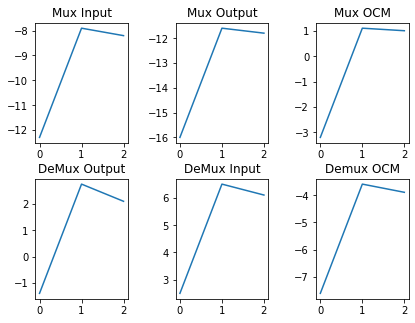

In [11]:
monitor4.plot_power('all', refresh=True, notebook=True)

In [67]:
tf.read_pm_data(10, '1/1/n1')

{'ImpTF600g64QNorm_indefinite_sop-tracking': '0',
 'CarrierTF_indefinite_opt-rcv-pwr': '-6.2',
 'Carrier_15min_opt-rcv-pwr-lo': '-38.9',
 'Carrier_15min_opt-rcv-pwr-mean': '-9.0',
 'Carrier_15min_opt-rcv-pwr-hi': '-6.1',
 'Carrier_24hour_opt-rcv-pwr-lo': '-53.2',
 'Carrier_24hour_opt-rcv-pwr-mean': '-11.5',
 'Carrier_24hour_opt-rcv-pwr-hi': '-4.6',
 'QualityTF_indefinite_carrier-frequency-offset': '-0.005',
 'QualityTF_indefinite_q-factor': '6.0',
 'QualityTF_indefinite_polarization-dependent-loss': '0.6',
 'Quality_15min_carrier-frequency-offset-lo': '-0.019',
 'Quality_15min_carrier-frequency-offset-mean': '0.0',
 'Quality_15min_carrier-frequency-offset-hi': '0.019',
 'Quality_15min_q-factor-lo': '0.0',
 'Quality_15min_q-factor-mean': '4.2',
 'Quality_15min_q-factor-hi': '6.0',
 'Quality_15min_polarization-dependent-loss-lo': '0.0',
 'Quality_15min_polarization-dependent-loss-mean': '0.4',
 'Quality_15min_polarization-dependent-loss-hi': '1.1',
 'Quality_24hour_carrier-frequency-offs

In [68]:
tf.read_pm_data(10, '1/1/n2')

{'ImpTF600g64QNorm_indefinite_sop-tracking': '45',
 'CarrierTF_indefinite_opt-rcv-pwr': '-5.9',
 'Carrier_15min_opt-rcv-pwr-lo': '-52.2',
 'Carrier_15min_opt-rcv-pwr-mean': '-10.7',
 'Carrier_15min_opt-rcv-pwr-hi': '-5.7',
 'Carrier_24hour_opt-rcv-pwr-lo': '-52.3',
 'Carrier_24hour_opt-rcv-pwr-mean': '-17.3',
 'Carrier_24hour_opt-rcv-pwr-hi': '-5.7',
 'QualityTF_indefinite_carrier-frequency-offset': '-0.007',
 'QualityTF_indefinite_q-factor': '6.0',
 'QualityTF_indefinite_polarization-dependent-loss': '0.7',
 'Quality_15min_carrier-frequency-offset-lo': '-0.02',
 'Quality_15min_carrier-frequency-offset-mean': '0.0',
 'Quality_15min_carrier-frequency-offset-hi': '0.018',
 'Quality_15min_q-factor-lo': '0.0',
 'Quality_15min_q-factor-mean': '3.9',
 'Quality_15min_q-factor-hi': '6.0',
 'Quality_15min_polarization-dependent-loss-lo': '0.0',
 'Quality_15min_polarization-dependent-loss-mean': '0.3',
 'Quality_15min_polarization-dependent-loss-hi': '1.3',
 'Quality_24hour_carrier-frequency-off

In [69]:
tf.read_pm_data(10, '1/2/n1')

{'ImpTF400g64QNorm_indefinite_sop-tracking': '0',
 'CarrierTF_indefinite_opt-rcv-pwr': '-6.7',
 'Carrier_15min_opt-rcv-pwr-lo': '-49.9',
 'Carrier_15min_opt-rcv-pwr-mean': '-10.9',
 'Carrier_15min_opt-rcv-pwr-hi': '-6.5',
 'Carrier_24hour_opt-rcv-pwr-lo': '-50.0',
 'Carrier_24hour_opt-rcv-pwr-mean': '-8.2',
 'Carrier_24hour_opt-rcv-pwr-hi': '-6.3',
 'QualityTF_indefinite_carrier-frequency-offset': '0.005',
 'QualityTF_indefinite_q-factor': '6.0',
 'QualityTF_indefinite_polarization-dependent-loss': '0.9',
 'Quality_15min_carrier-frequency-offset-lo': '-0.017',
 'Quality_15min_carrier-frequency-offset-mean': '0.0',
 'Quality_15min_carrier-frequency-offset-hi': '0.015',
 'Quality_15min_q-factor-lo': '0.0',
 'Quality_15min_q-factor-mean': '4.1',
 'Quality_15min_q-factor-hi': '6.0',
 'Quality_15min_polarization-dependent-loss-lo': '0.0',
 'Quality_15min_polarization-dependent-loss-mean': '0.4',
 'Quality_15min_polarization-dependent-loss-hi': '1.1',
 'Quality_24hour_carrier-frequency-offse